In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.models import Model
import cv2
import string

In [2]:
# Data paths
data_path = "E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples"

# List image files
load_data = os.listdir(data_path)

In [3]:
# Total number of images
n = len(load_data)

# Defining image shape
imgshape = (50, 200, 1)

# Total number of characters
characters = string.ascii_lowercase + "0123456789"
nchar = len(characters)

In [4]:
# Preprocessing the dataset
def preprocess():
    X = np.zeros((n, 50, 200, 1))
    y = np.zeros((5, n, nchar))

    for i, pic in enumerate(load_data):
        img = cv2.imread(os.path.join(data_path, pic), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (200, 50))  # Resize images to 200x50
        img = img / 255.0  # Normalize pixel values
        img = np.expand_dims(img, axis=-1)  # Add channel dimension
        pic_target = pic[:-4]

        if len(pic_target) < 6:
            target = np.zeros((5, nchar))
            for j, k in enumerate(pic_target):
                index = characters.find(k)
                target[j, index] = 1
            X[i] = img
            y[:, i] = target

    return X, y

# Create model
def createmodel():
    model_input = layers.Input(shape=imgshape)
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(model_input)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(conv3)

    flat = layers.Flatten()(mp3)

    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(nchar, activation='softmax')(drop)  # Changed activation to softmax

        outs.append(res)

    model = Model(model_input, outs)
    model.compile(loss=['categorical_crossentropy']*5,  # Changed loss function
                  optimizer='adam',
                  metrics=["accuracy"]*5)
    return model

In [5]:
# Create and compile model
model = createmodel()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 50, 200, 1)        │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 50, 200, 16)       │             160 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 25, 100, 16)       │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 25, 100, 32)       │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 13, 50, 32)        │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 13, 50, 32)        │           9,248 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 7, 25, 32)         │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 5600)              │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │         358,464 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 64)                │         358,464 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 64)                │         358,464 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 64)                │         358,464 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 64)                │         358,464 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               0 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64)                │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,818,068 (6.94 MB)

 Trainable params: 1,818,068 (6.94 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Preprocess data
X, y = preprocess()

# Split data into train and test sets
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [7]:
# Train the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]],
                 batch_size=32,
                 epochs=60,
                 validation_split=0.2)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - dense_1_accuracy: 0.0471 - dense_3_accuracy: 0.0347 - dense_5_accuracy: 0.0468 - dense_7_accuracy: 0.0453 - dense_9_accuracy: 0.0566 - loss: 17.4346 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.0722 - val_dense_5_accuracy: 0.0979 - val_dense_7_accuracy: 0.0412 - val_dense_9_accuracy: 0.0309 - val_loss: 17.4151
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - dense_1_accuracy: 0.0920 - dense_3_accuracy: 0.0677 - dense_5_accuracy: 0.0464 - dense_7_accuracy: 0.0691 - dense_9_accuracy: 0.0724 - loss: 16.4883 - val_dense_1_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.0773 - val_dense_5_accuracy: 0.0876 - val_dense_7_accuracy: 0.0722 - val_dense_9_accuracy: 0.1392 - val_loss: 17.1176
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - dense_1_accuracy: 0.1412 - dense_3_accuracy: 0.0945 - dense_5_accuracy: 0.0944 - dense_7_accuracy: 0.0603 - dense_9_accuracy: 0.0783 - loss: 15.6584 - val_dense_1_accuracy: 0.0000e+00 

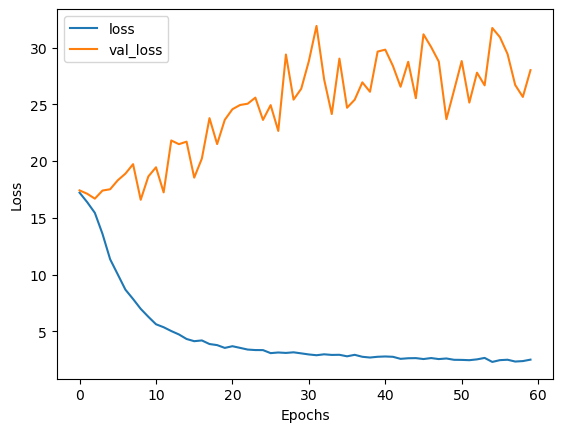

In [8]:
# Plot loss vs epochs
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [9]:
# Evaluate model on training and test sets
train_loss = model.evaluate(X_train, [y_train[0], y_train[1], 
                                      y_train[2], y_train[3], 
                                      y_train[4]])
test_loss = model.evaluate(X_test, [y_test[0], y_test[1], 
                                    y_test[2], y_test[3], 
                                    y_test[4]])
print("Loss on training set:", train_loss)
print("Loss on testing set:", test_loss)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - dense_1_accuracy: 0.9647 - dense_3_accuracy: 0.9928 - dense_5_accuracy: 0.9916 - dense_7_accuracy: 0.9916 - dense_9_accuracy: 0.9912 - loss: 0.8486
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - dense_1_accuracy: 0.0000e+00 - dense_3_accuracy: 0.8528 - dense_5_accuracy: 0.8242 - dense_7_accuracy: 0.8624 - dense_9_accuracy: 0.8763 - loss: 34.7435
Loss on training set: [6.168392181396484, 0.8041236996650696, 0.960824728012085, 0.9536082744598389, 0.9567010402679443, 0.9587628841400146]
Loss on testing set: [40.56047439575195, 0.0, 0.8299999833106995, 0.800000011920929, 0.8199999928474426, 0.8600000143051147]


In [10]:
# Evaluate the model on test data
test_metrics = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]], batch_size=32)

# Assuming you're interested in accuracy as one of the metrics
# For each output, calculate accuracy
accuracies = []
for i, metric_value in enumerate(test_metrics):
    if i % 2 == 0:  # Only consider metrics that correspond to accuracy
        accuracies.append(metric_value)

# Print accuracies for each output
for i, acc in enumerate(accuracies):
    print(f"Output {i+1} accuracy: {acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - dense_1_accuracy: 0.0000e+00 - dense_3_accuracy: 0.8528 - dense_5_accuracy: 0.8242 - dense_7_accuracy: 0.8624 - dense_9_accuracy: 0.8763 - loss: 34.7435
Output 1 accuracy: 40.56047439575195
Output 2 accuracy: 0.8299999833106995
Output 3 accuracy: 0.8199999928474426


In [11]:
# Function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 50))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    result = np.reshape(res, (5, nchar))
    k_ind = [np.argmax(i) for i in result]
    capt = ''.join([characters[k] for k in k_ind])
    return capt

# Predict on sample images
sample1_path = "E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples\\feyc8.png"
sample2_path = "E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples\\y5n6d.png"
print("Predicted Captcha (Sample 1):", predict(sample1_path))
print("Predicted Captcha (Sample 2):", predict(sample2_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted Captcha (Sample 1): feyc8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Captcha (Sample 2): g5n6d


[[192 192 192 ... 251 251 251]
 [192 192 192 ... 251 251 251]
 [192 192 192 ... 251 251 251]
 ...
 [195 195 195 ... 254 254 254]
 [195 195 195 ... 254 254 254]
 [195 195 195 ... 254 254 254]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Captcha (Sample 1): menw2


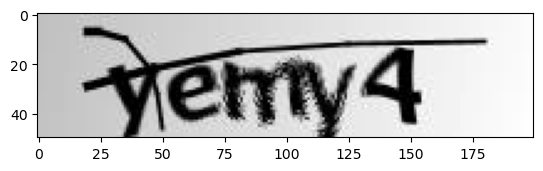

In [12]:
# Predict on sample images
img1 = cv2.imread("E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples\\yemy4.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap=plt.get_cmap('gray'))
print(img1)

# Predict on sample images
sample1_path = "E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples\\yemy4.png"
print("Predicted Captcha (Sample 1):", predict(sample1_path))


[[192 192 192 ... 251 251 251]
 [192 192 192 ... 251 251 251]
 [192 192 192 ... 251 251 251]
 ...
 [195 195 195 ... 254 254 254]
 [195 195 195 ... 254 254 254]
 [195 195 195 ... 254 254 254]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Captcha (Sample 2): g2x7x


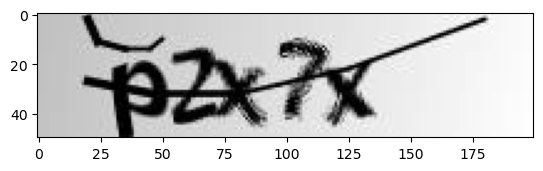

In [13]:
img=cv2.imread("E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples\\p2x7x.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))
print(img)

sample2_path = "E:\\Study\\Project_2_Captcha_Detection\\captcha_dataset\\samples\\p2x7x.png"
print("Predicted Captcha (Sample 2):", predict(sample2_path))